# Comportamiento del S&P500 ante la salida de una crísis económica (COVID-19)
> Se busca conocer el cierre del índice del 2022 (Octubre) 
utilizando los datos del comportamiento de su precio en los últimos 252 días comerciales después de las crisis mundiales que se han ido presentando a lo largo de este ultimo año como  la pandemia, la inflación y la guerra de Rusia y Ucrania.

Tras una investigación sobre el S&P500 nos percatamos que el desplome más reciente se registra desde el 3 de enero de 2022, cuando el índice alcanzaba un máximo histórico de 4.796 puntos, y los pronósticos de inflación y de aumento de tasas de interés ya auguraban una crisis en ciernes. Con el impacto de la guerra de Rusia en Ucrania, el índice acumulaba una pérdida del 20% hasta el 30 de junio de 2022 (3.785 puntos), si bien parece estar repuntando desde julio, rozando los 4.152 puntos este 4 de agosto. Por lo tanto despertó el interés por predicción del cierre para Octubre 2022.

### Para poder llegar al modelo planteamos nuestros objetivos con el fin de atender el propósito global de la investigación.
> #### Recoplicación de datos.
>  - Leer los datos del comportamiento del precio del S&P 500 en relación con los días transcurridos, recopilados en un excel. Graficar los datos obtenidos.

> #### Establecer matrices.
>  - Establecer una matriz de columnas x con unos, una matriz de variables x, una matriz para los valores del precio y los valores de Beta.

> #### Optimización.
>  - Optimizar la función otorgándonos curvas que describan la función original.
Graficar dichas curvas.
Evaluar las funciones obtenidas en un valor de "x" (días) en el futuro.

> #### Evaluación y resultado.
>  - Obtener un valor por grado 2 y un valor por grado 3.
Promediar dichos valores para obtener una media la cual será el resultado esperado para la fecha de Octubre 2022.

### *A partir de los datos del s&p (Leídos de excel) Se realizará una gráfica.*

In [3]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_excel("PriceHistory.xlsx")
DataP = data["Price"]
DataP

0      4357.727866
1      4354.188856
2      4395.637139
3      4448.984053
4      4455.477916
          ...     
248    3946.012382
249    3901.352835
250    3873.334273
251    3899.885942
252    3850.820000
Name: Price, Length: 253, dtype: float64

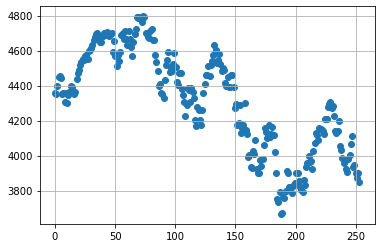

In [5]:
n = len(DataP)
x = np.linspace(0,253,n)
plt.figure()
plt.scatter(x,DataP)
plt.grid()


### *Se procede a generar una función de precio la cual toma en cuenta la beta y la prediccion del valor para obtener el precio utilizando la formúla de      "(y-pred)^T * (y-pred)".*

In [6]:
def funcion_precio(beta, X, y, s):
    beta = np.reshape(beta, [s,-1])
    pred = X @ beta
    precio = (y-pred).T @ (y-pred)
    return precio [0][0]

# Columnas de x con unos:
ones = np.ones([n,1])
x1 = np.reshape(x,[n,-1])
x2 = np.reshape(x**2,[n,-1])
x3 = np.reshape(x**3,[n,-1])

# matrices de variables x

MatX1 = np.hstack((ones,x1))
MatX2 = np.hstack((ones,x1,x2))
MatX3 = np.hstack((ones,x1,x2,x3))

# BETA 
beta1 = np.random.rand(2)
beta2 = np.random.rand(3)
beta3 = np.random.rand(4)

y = np.reshape(list(DataP),[n,-1])
y



array([[4357.72786634],
       [4354.18885569],
       [4395.63713885],
       [4448.98405341],
       [4455.47791588],
       [4443.11040057],
       [4352.63434664],
       [4359.46105752],
       [4307.53875079],
       [4357.03887534],
       [4300.45901202],
       [4345.71622004],
       [4363.54516207],
       [4399.76330792],
       [4391.33805217],
       [4361.19048622],
       [4350.64596787],
       [4363.80450766],
       [4438.2643801 ],
       [4471.36845422],
       [4486.46049234],
       [4519.63061194],
       [4536.19213973],
       [4549.7813469 ],
       [4544.89825268],
       [4566.47800207],
       [4574.78883673],
       [4551.68113535],
       [4596.4150792 ],
       [4605.37664818],
       [4613.67300764],
       [4630.65336098],
       [4660.56958256],
       [4680.05584256],
       [4697.52680549],
       [4701.70204336],
       [4685.25117736],
       [4646.70766757],
       [4649.26920323],
       [4682.84739595],
       [4682.80354371],
       [4700.897

### *La matriz de x se conforma por una matríz de unos y x1, x2 o xn, segun sea el grado y la de beta por betas aleatorias ajustadas al grado de la ecuación.*

In [7]:
print("Grado 1:",funcion_precio(beta1,MatX1,y,2))
print("Grado 2:",funcion_precio(beta2,MatX2,y,3))
print("Grado 3:",funcion_precio(beta3,MatX3,y,4))

Grado 1: 4583576169.290741
Grado 2: 15268380722.414593
Grado 3: 7500482803375555.0


### *Se minimizara el error de las matrices según su grado utilizando la función de precio y la beta en x1, x2 y x3.*

In [8]:
import scipy.optimize as opt

sol1 = opt.minimize(funcion_precio,beta1,args=(MatX1,y,2))
sol2 = opt.minimize(funcion_precio,beta2,args=(MatX2,y,3))
sol3 = opt.minimize(funcion_precio,beta3,args=(MatX3,y,4))
sol1

      fun: 8790744.936796203
 hess_inv: array([[ 7.85887036e-03, -4.64996088e-05],
       [-4.64996088e-05,  3.67572787e-07]])
      jac: array([ 0.  , -0.25])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 90
      nit: 5
     njev: 26
   status: 2
  success: False
        x: array([ 4.69901683e+03, -3.07089376e+00])

In [9]:
sol2

      fun: 8313750.676075557
 hess_inv: array([[ 1.75095742e-02, -2.76283944e-04,  9.08212402e-07],
       [-2.76283944e-04,  5.83859333e-06, -2.16239982e-08],
       [ 9.08212402e-07, -2.16239982e-08,  8.54683832e-11]])
      jac: array([ 0.    ,  0.125 , -0.1875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 168
      nit: 4
     njev: 40
   status: 2
  success: False
        x: array([ 4.60306926e+03, -7.86370648e-01, -9.02976304e-03])

In [10]:
sol3

      fun: 4845975.501559133
 hess_inv: array([[ 3.06069625e-02, -9.16941364e-04,  7.29889043e-06,
        -1.69024756e-08],
       [-9.16941364e-04,  3.67322167e-05, -3.28165477e-07,
         8.08544107e-10],
       [ 7.29889043e-06, -3.28165477e-07,  3.12319243e-09,
        -8.00832187e-12],
       [-1.69024756e-08,  8.08544107e-10, -8.00832187e-12,
         2.11092149e-14]])
      jac: array([ 0.0000000e+00, -8.0625000e+00, -1.0742500e+03, -2.3516375e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 332
      nit: 16
     njev: 64
   status: 2
  success: False
        x: array([ 4.30289614e+03,  1.35935781e+01, -1.51405658e-01,  3.75166800e-04])

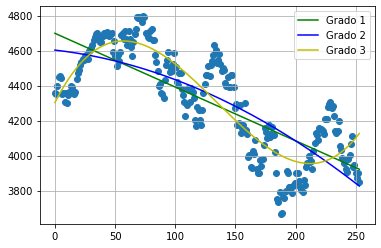

In [11]:
y1 = sol1.x[0] + sol1.x[1]*x
y2 = sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2
y3 = sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure()
plt.scatter(x,DataP)
plt.plot(x,y1,"g", label = "Grado 1")
plt.plot(x,y2,"b", label = "Grado 2")
plt.plot(x,y3,"y", label = "Grado 3")

plt.legend()
plt.grid()

In [12]:
end = len(DataP)+40
end

293

### *Las funciones de grado 2 y grado 3 obtenidas se evaluaran en la fecha futura, de los dos resultados se hará un promedio y obtendremos una predicción para el precio del s&p en (octubre 2022)*

In [13]:
import sympy as sp
sp.var("x")

y2 = sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2
y2

-0.00902976303666537*x**2 - 0.786370648327405*x + 4603.06925653378

In [14]:
end_y2 = y2.subs(x,end)
end_y2

3597.46652963916

In [15]:
y3 = sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3
y3

0.000375166799976972*x**3 - 0.151405658271395*x**2 + 13.5935780922047*x + 4302.89613624575

In [16]:
end_y3 = y3.subs(x,end)
end_y3

4724.64468140909

In [17]:
pred_promedio = (end_y3+end_y2)/2
pred_promedio

4161.05560552412

### *La predicción para el precio del s&p en (octubre 2022) fue de:*
$$4161.05560552412$$

## De todo lo anterior 
> Se desprende que obtuvimos una predicción promedio del precio del s&p utilizando los datos de los últimos 252 días comericales, con la limitante de que se hizo considerando que está función mantendrá su curso y no se verá afectada por algún cambio drástico en la economía mundial. Por lo que sabemos que este precio será cercano al precio real en octubre 2022.

#### Referencias
>>- FactSet Research Systems. (n.d.). S@p 500. (septemer, 2022) [Historic price]. Retrieved september 20, 2022, from https://www.factset.com/